## IMPORTACI√ìN DE LIBRER√çAS

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## CARGA DEL DATASET

In [4]:
df = pd.read_csv('dataset_finanzas_personales_madrid_34_a√±os.csv', delimiter = ',')

## DEFINICI√ìN DEL CAMPO 'ID' COMO √çNDICE

In [5]:
df.set_index('ID',inplace=True)

## PRIMERA EXPLORACI√ìN

In [6]:
df.head()

A√ëO  MES  DIA     FECHA      TIPO         PRECIO
ID                                                   
1   2024    1    1  1/1/2024  Vivienda    1,100.00 ‚Ç¨ 
2   2024    1    1  1/1/2024   Ingreso        1.16 ‚Ç¨ 
3   2024    1    1  1/1/2024   Estudio       48.00 ‚Ç¨ 
4   2024    1    2  1/2/2024    Regalo       16.99 ‚Ç¨ 
5   2024    1    2  1/2/2024   Deporte       58.54 ‚Ç¨

In [7]:
df.tail()

A√ëO  MES  DIA      FECHA          TIPO      PRECIO
ID                                                      
310  2024    8   20  8/20/2024       Belleza    10.40 ‚Ç¨ 
311  2024    8   20  8/20/2024  Supermercado     5.99 ‚Ç¨ 
312  2024    8   21  8/21/2024       Ingreso     2.00 ‚Ç¨ 
313  2024    8   24  8/24/2024     Servicios     1.39 ‚Ç¨ 
314  2024    8   27  8/27/2024  Supermercado    49.97 ‚Ç¨

#### CANTIDAD DE NULOS

In [8]:
df.isnull().sum()

A√ëO       0
MES       0
DIA       0
FECHA     0
TIPO      0
PRECIO    0
dtype: int64

#### INFORMACI√ìN DE LOS CAMPOS

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314 entries, 1 to 314
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A√ëO     314 non-null    int64 
 1   MES     314 non-null    int64 
 2   DIA     314 non-null    int64 
 3   FECHA   314 non-null    object
 4   TIPO    314 non-null    object
 5   PRECIO  314 non-null    object
dtypes: int64(3), object(3)
memory usage: 17.2+ KB


## TRANSFORMACION DE CAMPOS

### CAMPO FECHA

In [10]:
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%m/%d/%Y')

### CAMPO PRECIO

In [11]:
df['PRECIO'] = df['PRECIO'].str.replace(' ‚Ç¨','') # Ejemplo: 1,424.18 ‚Ç¨ => 1,424.18
df['PRECIO'] = df['PRECIO'].str.replace(',','') #Separador de miles | Ejemplo: 1,424.18 => 1424.18
df['PRECIO'] = df['PRECIO'].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314 entries, 1 to 314
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A√ëO     314 non-null    int64         
 1   MES     314 non-null    int64         
 2   DIA     314 non-null    int64         
 3   FECHA   314 non-null    datetime64[ns]
 4   TIPO    314 non-null    object        
 5   PRECIO  314 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 17.2+ KB


## AN√ÅLISIS DESCRIPTIVO

### CONTEO DE VALORES

In [13]:
#Conteo de frecuencias
df['TIPO'].value_counts()

TIPO
Supermercado    68
Vivienda        41
Gastronom√≠a     38
Ingreso         34
Servicios       25
Deporte         17
Viajes          14
Transporte      12
Estudio         10
Regalo          10
Salud           10
Belleza          9
Herramientas     9
Ropa             6
Actividades      6
Caf√©             4
Teatro           1
Name: count, dtype: int64

In [14]:
#En porcentaje
df['TIPO'].value_counts(normalize=True)*100

TIPO
Supermercado    21.656051
Vivienda        13.057325
Gastronom√≠a     12.101911
Ingreso         10.828025
Servicios        7.961783
Deporte          5.414013
Viajes           4.458599
Transporte       3.821656
Estudio          3.184713
Regalo           3.184713
Salud            3.184713
Belleza          2.866242
Herramientas     2.866242
Ropa             1.910828
Actividades      1.910828
Caf√©             1.273885
Teatro           0.318471
Name: proportion, dtype: float64

### SUMA DE PRECIOS POR TIPO

In [15]:
#Sumar los 'PRECIOS' por 'TIPO' y orderdarlos de mayor a menor
df.groupby('TIPO')['PRECIO'].sum().sort_values(ascending=False)

TIPO
Ingreso         14906.03
Vivienda         9139.72
Supermercado     1458.78
Deporte           733.69
Herramientas      692.43
Gastronom√≠a       418.44
Viajes            398.40
Ropa              281.09
Salud             244.43
Estudio           228.00
Servicios         118.87
Belleza           113.09
Regalo             82.92
Transporte         58.15
Caf√©               34.65
Actividades        32.31
Teatro             15.00
Name: PRECIO, dtype: float64

In [16]:
#En porcentaje
df_gastos = df[df['TIPO']!='Ingreso']
df_gastos.groupby('TIPO')['PRECIO'].sum().sort_values(ascending=False)/df_gastos['PRECIO'].sum()*100

TIPO
Vivienda        65.051527
Supermercado    10.382798
Deporte          5.222004
Herramientas     4.928338
Gastronom√≠a      2.978227
Viajes           2.835593
Ropa             2.000645
Salud            1.739719
Estudio          1.622779
Servicios        0.846052
Belleza          0.804913
Regalo           0.590179
Transporte       0.413880
Caf√©             0.246620
Actividades      0.229965
Teatro           0.106762
Name: PRECIO, dtype: float64

### MODA

In [17]:
df['TIPO'].mode()

0    Supermercado
Name: TIPO, dtype: object

### MEDIA

In [18]:
round(df['PRECIO'].mean(),2)

92.22

### MEDIANA

In [19]:
df["PRECIO"].median()

10.0

### M√ÅXIMO

In [20]:
df["PRECIO"].max()

2057.19

### M√çNIMO

In [21]:
df["PRECIO"].min()

0.05

### √çNDICE DEL VALOR M√ÅXIMO

In [22]:
df['PRECIO'].idxmax()

140

In [23]:
df.loc[140]

A√ëO                      2024
MES                         4
DIA                        10
FECHA     2024-04-10 00:00:00
TIPO                  Ingreso
PRECIO                2057.19
Name: 140, dtype: object

### √çNDICE DEL VALOR M√çNIMO

In [24]:
df['PRECIO'].idxmin()

104

In [25]:
df.loc[104]

A√ëO                      2024
MES                         3
DIA                        25
FECHA     2024-03-25 00:00:00
TIPO                  Ingreso
PRECIO                   0.05
Name: 104, dtype: object

### PRIMERA FECHA

In [26]:
df['FECHA'].min()

Timestamp('2024-01-01 00:00:00')

### √öLTIMA FECHA

In [27]:
df['FECHA'].max()

Timestamp('2024-08-27 00:00:00')

## RELACI√ìN INGRESO / EGRESO

### INGRESOS

In [28]:
#Sumar los 'PRECIOS' cuando 'TIPO' = 'Ingreso'
ingresos = df[df['TIPO']=='Ingreso']['PRECIO'].sum()
ingresos

14906.03

### EGRESOS

In [29]:
#Sumar los 'PRECIOS' cuando 'TIPO' sea distinto a 'Ingreso'
egresos = round(df[df['TIPO']!='Ingreso']['PRECIO'].sum(),2)
egresos

14049.97

### DIFERENCIA INGRESOS vs EGRESOS

In [30]:
dif = ingresos - egresos
round(dif,2)

856.06

In [31]:
data = pd.DataFrame({
    'Tipo': ['Ingresos', 'Egresos'],
    'Monto': [ingresos, egresos]
})

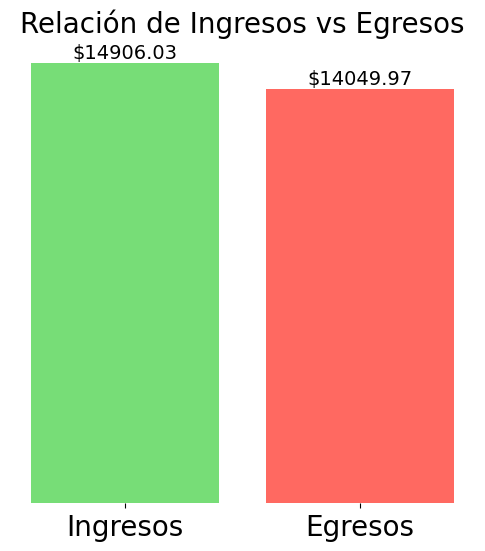

In [50]:
plt.figure(figsize=(6, 6))

pastel_colors = ['#77dd77', '#ff6961']
plt.bar(data['Tipo'], data['Monto'], color=pastel_colors)

plt.title('Relaci√≥n de Ingresos vs Egresos', fontsize=20)
plt.xticks(fontsize=20)

plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0)

plt.grid(False)

for i, v in enumerate(data['Monto']):
    plt.text(i, v + 0.01 * max(data['Monto']), f"${v:.2f}", ha='center', fontsize = 14)

plt.show()

#### CONCLUSI√ìN

En este gr√°fico de barras podemos observar como la persona pudo generar desde el 2024-01-01 al 2024-08-27 **mayores ingresos que egresos**, con una diferencia de **856.06 ‚Ç¨**

## DISCRIMINACI√ìN DE EGRESOS

In [38]:
#Sumar los 'PRECIOS' por 'TIPO' excepto 'Ingreso'. Orderdarlos de mayor a menor
egresos_discriminados = df[df['TIPO'] != 'Ingreso'].groupby('TIPO')['PRECIO'].sum().sort_values(ascending=False)
egresos_discriminados

TIPO
Vivienda        9139.72
Supermercado    1458.78
Deporte          733.69
Herramientas     692.43
Gastronom√≠a      418.44
Viajes           398.40
Ropa             281.09
Salud            244.43
Estudio          228.00
Servicios        118.87
Belleza          113.09
Regalo            82.92
Transporte        58.15
Caf√©              34.65
Actividades       32.31
Teatro            15.00
Name: PRECIO, dtype: float64

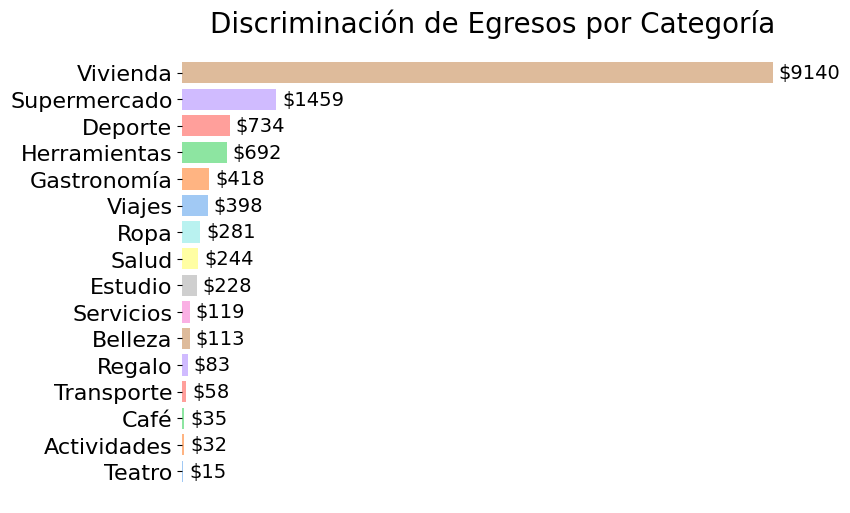

In [45]:
plt.figure(figsize=(8, 6))

egresos_discriminados = egresos_discriminados.sort_values(ascending=True)

pastel_colors = sns.color_palette("pastel", len(egresos_discriminados))
plt.barh(egresos_discriminados.index, egresos_discriminados.values, color=pastel_colors)

plt.title('Discriminaci√≥n de Egresos por Categor√≠a', fontsize=20)
plt.xticks(fontsize=20)

plt.yticks(fontsize=16)
plt.xticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0)
plt.grid(False)

for i, v in enumerate(egresos_discriminados):
    plt.text(v + 0.01 * max(egresos_discriminados), i, f"${v:.0f}", va='center', fontsize=14)

plt.show()

#### CONCLUSI√ìN

Se observa como 'Vivienda' acapara el **65.05%** de los egresos de la persona siendo este el gasto m√°s determinante en el transcursos de los meses

Este documento fue creado por [Fede Labate](https://www.linkedin.com/in/fhlabate/) con un dataset ficticio intentando simular las finanzas personales de una persona de 34 a√±os residente de Madrid. 

Espero que os inspire en su proceso de formaci√≥n y cualquier duda o curiosidad, pueden escribirme por Linkedin üôå